# How Does Social Media Drive Music Consumption in the Streaming Era?


## Introduction
This report analyzes the dataset to identify key trends and insights

In [75]:
# Libraries for data extraction from spotify and Reddit loaded
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import praw
from praw.models import MoreComments

# Generic libraries for code processing, visualisation loaded
import string
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Sentiment Analysis and topic modelling libraries loaded
import nltk
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
#API information to connect with spotify data
client_id = 'ddfcd914e940448197f547dafb50fdfb'
client_secret = '0b2ad82c07314fc0a1dbb28c367e6d65'
clientManager = SpotifyClientCredentials(client_id, client_secret)
clientInst = spotipy.Spotify(client_credentials_manager=clientManager)

In [79]:
user = 'spotify'
playlist_id = '37i9dQZF1EQnqst5TRi17F'

def getTrackID(userId, playlistId):
    """
        Connect to Spotify API playlist and get the track IDs
        @userId: Denotes the id of the spotify user to whom playlist belongs
        @playlistId: Denotes the id of the playlist to get playlist data
        @returns: array of track IDs
    """
    ids = []
    limit = 50
    play_list = clientInst.user_playlist_tracks(userId,playlistId, limit=limit)
    for item in play_list['items']:
        track = item['track']
        ids.append(track['id'])
    return ids
ids = getTrackID(user, playlist_id)

C:\Users\hp\anaconda3\Lib\site-packages\spotipy\client.py:781: DeprecationWarning: You should use `playlist_tracks(playlist_id)` instead
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\spotipy\client.py:693: DeprecationWarning: You should use `playlist_items(playlist_id, ...,additional_types=('track',))` instead
  warnings.warn(


In [81]:
def getTrackFeatures(id):
    '''
    Retrieve the track features like song name, album, artists, durations, song popularity, energy, liveness
    @id: track ID for each song
    @returns: song features in an array
    '''
    meta = clientInst.track(id)
    features = clientInst.audio_features(id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    #features
    energy = features[0]['energy']
    liveness = features[0]['liveness']

    track = [name, album, artist, release_date, length, popularity, energy, liveness]
    return track

In [17]:
#Code to call all the track features and retrieve the song data which is then converted to dataframe and exported to csv file
tracks = []
for i in range(len(ids)):
    track = getTrackFeatures(ids[i])
    tracks.append(track)

df = pd.DataFrame(tracks, columns = ['name','album','artist', 'release_date','length','popularity','energy','liveness'])
df.to_csv('spotify.csv', sep = ',')

In [18]:
df

,name,album,artist,release_date,length,popularity,energy,liveness
0,HIGHEST IN THE ROOM,HIGHEST IN THE ROOM,Travis Scott,2019-10-04,175720,85,0.427,0.2100
1,See You Again (feat. Kali Uchis),Flower Boy,"Tyler, The Creator",2017-07-21,180386,89,0.559,0.1090
2,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,274192,90,0.472,0.1410
3,Without Me,The Eminem Show,Eminem,2002-05-26,290320,86,0.669,0.2370
4,Still D.R.E.,2001,Dr. Dre,1999-11-16,270586,81,0.775,0.0543
5,Like That,WE DON'T TRUST YOU,Future,2024-03-22,267706,85,0.676,0.1190
6,Ni**as In Paris,Watch The Throne,JAY-Z,2011-08-08,219333,80,0.858,0.3490
7,HUMBLE.,DAMN.,Kendrick Lamar,2017-04-14,177000,84,0.621,0.0958
8,The Real Slim Shady,The Marshall Mathers LP,Eminem,2000-05-23,284200,85,0.661,0.0454
9,"Nuthin' But A ""G"" Thang",The Chronic,Dr. Dre,1992-12-15,237573,76,0.821,0.1470


In [21]:
#data description: top 10 records
df.head(10)

,name,album,artist,release_date,length,popularity,energy,liveness
0,HIGHEST IN THE ROOM,HIGHEST IN THE ROOM,Travis Scott,2019-10-04,175720,85,0.427,0.2100
1,See You Again (feat. Kali Uchis),Flower Boy,"Tyler, The Creator",2017-07-21,180386,89,0.559,0.1090
2,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,274192,90,0.472,0.1410
3,Without Me,The Eminem Show,Eminem,2002-05-26,290320,86,0.669,0.2370
4,Still D.R.E.,2001,Dr. Dre,1999-11-16,270586,81,0.775,0.0543
5,Like That,WE DON'T TRUST YOU,Future,2024-03-22,267706,85,0.676,0.1190
6,Ni**as In Paris,Watch The Throne,JAY-Z,2011-08-08,219333,80,0.858,0.3490
7,HUMBLE.,DAMN.,Kendrick Lamar,2017-04-14,177000,84,0.621,0.0958
8,The Real Slim Shady,The Marshall Mathers LP,Eminem,2000-05-23,284200,85,0.661,0.0454
9,"Nuthin' But A ""G"" Thang",The Chronic,Dr. Dre,1992-12-15,237573,76,0.821,0.1470


In [15]:
#data pre-processing: checking for missing data
df.isnull().sum()

name            0
album           0
artist          0
release_date    0
length          0
popularity      0
energy          0
liveness        0
dtype: int64

In [17]:
#descriptive analysis: summary statistics for data
df.describe()

,length,popularity,energy,liveness
count,50.000000,50.000000,50.000000,50.000000
mean,243953.020000,78.800000,0.676580,0.184892
std,47180.742029,5.115004,0.157604,0.126527
min,142273.000000,69.000000,0.346000,0.045400
25%,211066.500000,75.250000,0.561500,0.096850
50%,244018.000000,79.500000,0.696500,0.145000
75%,277048.000000,81.000000,0.771750,0.261000
max,350320.000000,90.000000,0.954000,0.559000


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


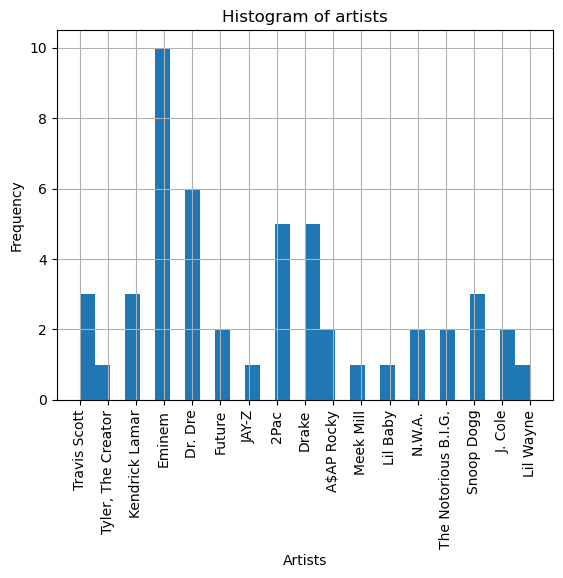

In [23]:
#Descriptive analysis: data visualisation about number of songs per artist
df['artist'].hist(bins=30)
plt.title('Histogram of artists')
plt.xlabel('Artists')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

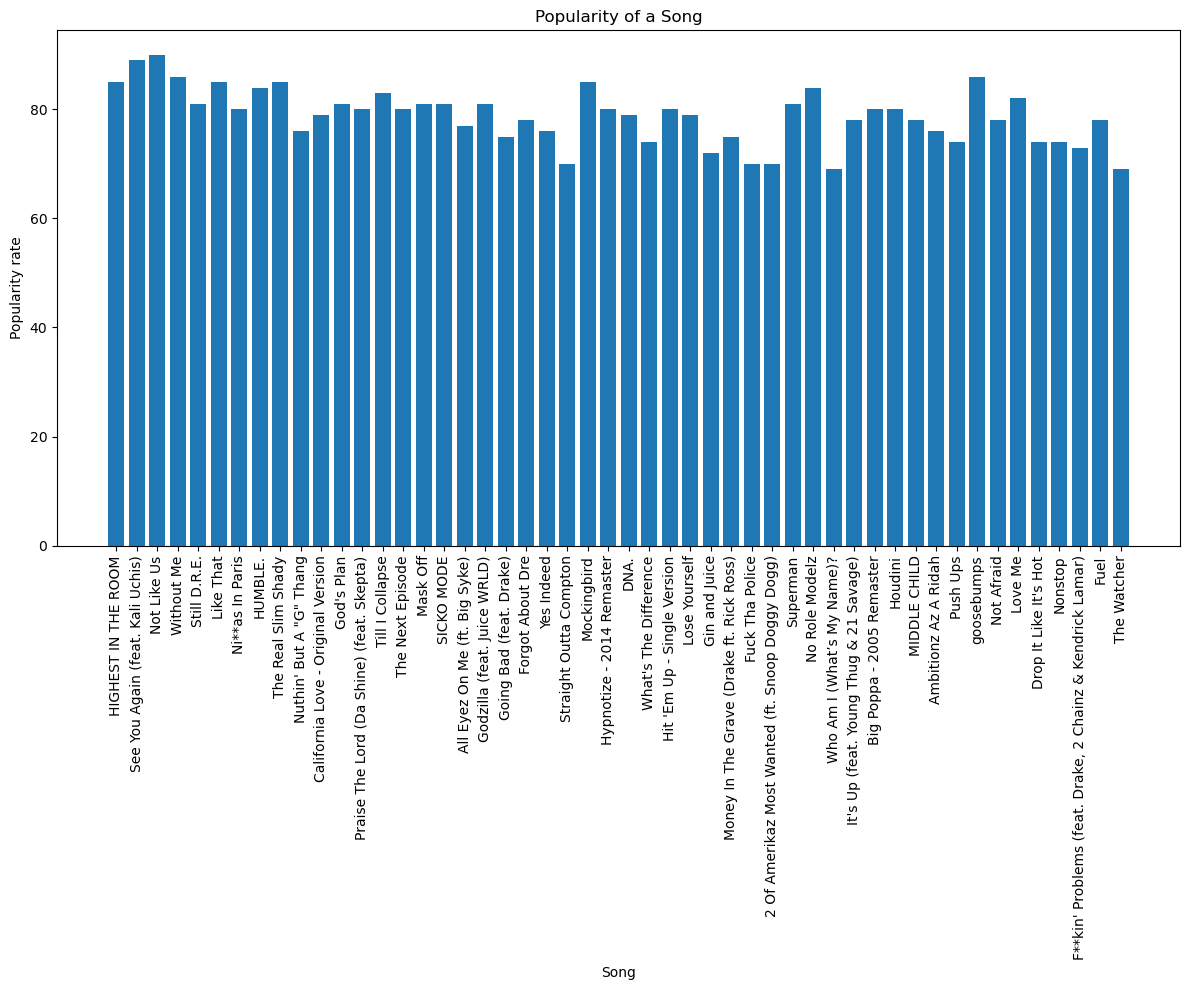

In [61]:
#Descriptive analysis: data visualisation about popularity of a song
plt.figure(figsize=(12, 10))
y = df['popularity']
x = df['name']
plt.bar(x,y)
plt.title("Popularity of a Song")
plt.ylabel('Popularity rate')
plt.xlabel('Song')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('popularitypersong.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
def redditClient():
    """
        Setup Reddit API authentication.
        @returns: praw Reddit object
    """
    reddit_read_only = praw.Reddit(client_id="tU4M5ZZKh-_XY_Ls_1_cfQ",
                               client_secret="e1JYHK0uiikKzk_GWLFy0k4Etf_5Cg",
                               user_agent="zrmit")
    return reddit_read_only

In [118]:
#Post class creates objects for each post using the below properties
class Post:
    def __init__(self, song, post_topic, post_body, post_comments, comment_count, comment_authors):
        '''
        Constructor to initialize each post
        @song: Song about which the posts are fetched
        @post_topic: Topic of post
        @post_body: body of post
        @post_comments: comments on post
        @comment_count: number of comments
        @comment_authors: comment author names
        '''
        self.song = song
        self.post_topic = post_topic
        self.post_body = post_body
        self.post_comments = post_comments
        self.comment_count = comment_count
        self.comment_authors = comment_authors

In [134]:
#[THIS CODE IS COMMENTED AS IT IS ONLY RUN ONCE] Purpose of the below code was to extract reddit comments and posts data about each song and compile in a json file
# def dataFileCreation(subreddit, retrievalLimit, songList):
#     post_arr = []
#     for song in songList:
#         for post in subreddit.search(song, limit=retrievalLimit):
#             post_comments = []
#             comment_authors = []
#             for comment in post.comments.list():
#                 if isinstance(comment, MoreComments):
#                     continue
#                 post_comments.append(comment.body)
#                 if comment.author is not None:
#                     comment_authors.append(comment.author.name)
#                 else:
#                     comment_authors.append("Unknown")
#             post_arr.append(Post(song, post.title, post.selftext, post_comments, post.num_comments, comment_authors))
#     with open('songs_data.json', 'w') as f:
#         json.dump([ob.__dict__ for ob in post_arr], f, indent=4)

# def createFile():
#     client = redditClient()
#     topicOfInterest = "hiphopheads"
#     songs = np.array(df['name'])
#     subreddit = client.subreddit(topicOfInterest)
#     dataFileCreation(subreddit, 30, songs)

# createFile()

In [39]:
def processText(text, tokenizer, stemmer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and keyword removal for reddit

    @param text: reddit submission or comment text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """
    text = text.lower()
    lTokens = tokenizer.tokenize(text)
    lTokens = [token.strip() for token in lTokens]
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])
    regexDigit = re.compile("^\d+\s|\s\d+\s|\s\d+$")
    regexHttp = re.compile("^http")
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit() and regexDigit.match(tok) == None and regexHttp.match(tok) == None]

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_40316\502712873.py:16: SyntaxWarning: invalid escape sequence '\d'
  regexDigit = re.compile("^\d+\s|\s\d+\s|\s\d+$")


In [41]:
def preprocessText(textType):
    '''
    Main function for text preprocessing
    @textType: Text to be used to get tokens
    @lTokens: Token values returned in an array for each post
    '''
    tweetTokeniser = nltk.tokenize.TweetTokenizer()
    lPunct = list(string.punctuation)
    lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']
    tweetStemmer = nltk.stem.PorterStemmer()
    lTokens = processText(text=textType,
                               tokenizer=tweetTokeniser,
                               stemmer=tweetStemmer,
                               stopwords=lStopwords)
    return lTokens

In [170]:
#We have avoided to use this code but the implementation can be tested by commenting out the execution call
def vaderPrintTokens(lTokens, dSentimentScores):
    """
    Print out the tokens and sentiment score.
    @param lTokens: List of tokens to print and colour.
    @dSentimentScores: Dictionary of sentiment from Vader.

    """
    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [173]:
def sentimentAnalysis(song, posts):
    '''
    Main function for sentiment analysis
    @song: Song for which posts are analyzed
    @posts: An array of all the posts on a particular song in reddit
    @return: An array of compound sentiment scores for the posts and comments
    '''
    lSentiment = []
    sentAnalyser = SentimentIntensityAnalyzer()
    for post in posts:
        postTitle = post.get('post_topic','')
        lTokensTopic = preprocessText(postTitle)
        dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokensTopic))
        lSentiment.append([dSentimentScores['compound']])
        # vaderPrintTokens(lTokensTopic, dSentimentScores)

        for comment in post.get('post_comments',''):
            lTokensComment = preprocessText(comment)
            dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokensComment))
            lSentiment.append([dSentimentScores['compound']])
            # vaderPrintTokens(lTokensComment, dSentimentScores)
    return lSentiment

In [175]:
def sentimentScores(dataFile):
    '''
    Connects sentiment scores with the respective songs
    @dataFile: json file required to get all the data for sentiment analysis
    @returns: sentiment dictionary where each key is the song name and sentiment scores array as value
    '''
    with open(dataFile, 'r') as f:
        musicReddits = json.load(f)
        sentiment_dict = {}
        df = pd.DataFrame(musicReddits)
        posts_by_song = df.groupby('song').apply(lambda x: x.to_dict(orient='records')).to_dict()
        for key, value in posts_by_song.items():
            sentiment_scores = sentimentAnalysis(key, value)
            sentiment_dict[key] = sentiment_scores
    return sentiment_dict

In [177]:
#Data file and function call which executes the sentiment analyzer on each post 
#and comment for each song and related to the song to provide data in dictioinary format
dataFile = 'songs_data.json'
sentimentDictionary = sentimentScores(dataFile)

C:\Users\hp\AppData\Local\Temp\ipykernel_39576\1769379512.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  posts_by_song = df.groupby('song').apply(lambda x: x.to_dict(orient='records')).to_dict()


ValueError: All arrays must be of the same length

In [209]:
#how does our dictionary look like
sentimentDictionary

{'All Eyez On Me (ft. Big Syke)': [[0.0], [0.4023], [0.5574]],
 'Ambitionz Az A Ridah': [[0.0],
  [0.4215],
  [0.0],
  [0.6369],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.6249],
  [0.0],
  [0.5106],
  [0.7964],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.7184],
  [0.3612],
  [0.2263],
  [-0.5994],
  [0.0],
  [0.0],
  [0.4215],
  [0.3612],
  [0.34],
  [-0.7859],
  [0.0],
  [0.2263],
  [-0.8957],
  [0.5994],
  [0.0],
  [0.4404],
  [0.0],
  [0.6369],
  [-0.0258],
  [-0.6597],
  [0.0],
  [-0.5574],
  [0.0],
  [0.6249],
  [0.6597],
  [-0.2755],
  [0.25],
  [0.3182],
  [0.34],
  [0.0],
  [-0.8519],
  [0.4404],
  [0.3612],
  [0.0],
  [0.25],
  [0.2263],
  [0.3182],
  [0.0],
  [0.0],
  [0.5267],
  [0.0],
  [0.4404],
  [0.4939],
  [0.5994],
  [0.5574],
  [-0.8555],
  [0.4767],
  [-0.34],
  [0.0],
  [0.0],
  [0.0],
  [-0.7506],
  [0.4404],
  [0.3612],
  [0.6808],
  [0.0],
  [-0.2732],
  [0.0],
  [0.4019],
  [-0.802],
  [-0.7351],
  [-0.0772],
  [-0.3612],
  [0.0],
  [-0.1027],
  [-0.5267],


In [25]:
#In order to make visualization easier, we get the summary statistics for each song's compound sentiment score array.
# We take the mean and count and put that in a dictionary
means = {}
counts = {}
for key in sentimentDictionary.keys():
    sentimentTrends = pd.DataFrame(sentimentDictionary[key], columns = ['sentiment'])
    sentimentStats = sentimentTrends['sentiment'].describe()
    means[key] = sentimentStats['mean']
    counts[key] = sentimentStats['count']

C:\Users\hp\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\hp\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\hp\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'sentimentDictionary' is not defined

In [241]:
means

{'All Eyez On Me (ft. Big Syke)': 0.3199,
 'Ambitionz Az A Ridah': 0.11075566397963514,
 'Big Poppa - 2005 Remaster': 0.08614840871021776,
 'California Love - Original Version': 0.16419074188882002,
 'DNA.': 0.06089386095521706,
 "Drop It Like It's Hot": 0.15286922552804905,
 'Forgot About Dre': 0.13557425488180883,
 'Fuck Tha Police': 0.04299502989536623,
 'Fuel': 0.09428911947820931,
 'Gin and Juice': 0.12568608169440243,
 "God's Plan": 0.11058714739069112,
 'Godzilla (feat. Juice WRLD)': 0.1309863025210084,
 'Going Bad (feat. Drake)': 0.16108433524569718,
 'HIGHEST IN THE ROOM': 0.1138921766072812,
 'HUMBLE.': 0.05452555415390161,
 "Hit 'Em Up - Single Version": 0.24943647148871032,
 'Houdini': 0.10185154377880183,
 'Hypnotize - 2014 Remaster': 0.1829882304526749,
 "It's Up (feat. Young Thug & 21 Savage)": 0.0671436060539592,
 'Like That': 0.0941757742167807,
 'Lose Yourself': 0.1047689749847468,
 'Love Me': 0.063004500691085,
 'MIDDLE CHILD': 0.12951548692182652,
 'Mask Off': 0.056

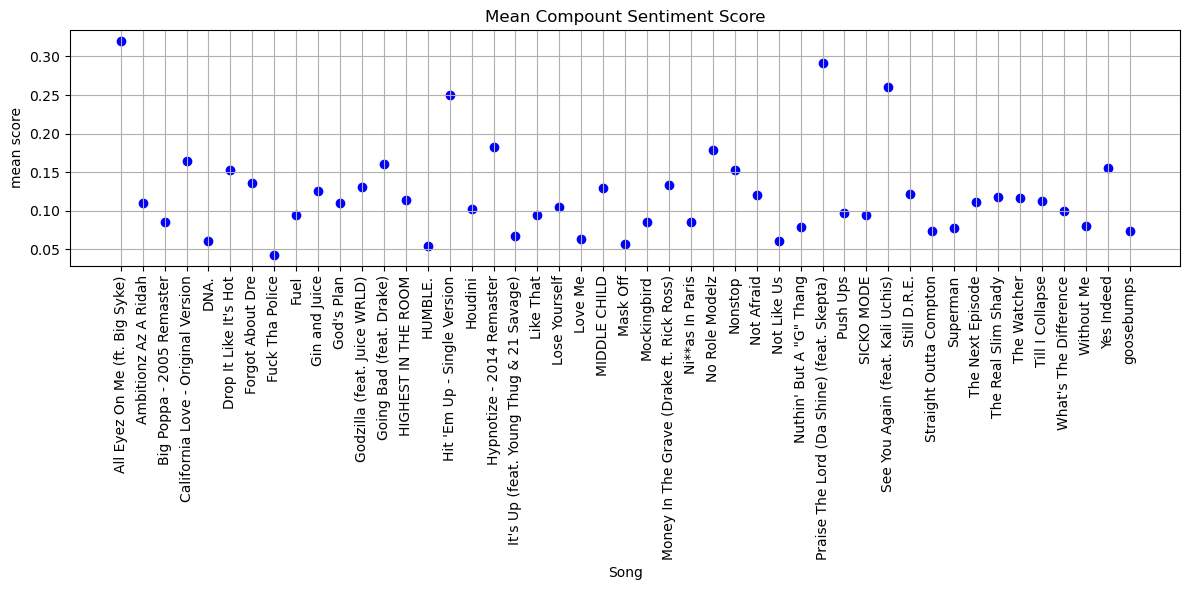

In [249]:
#Visualisation code for scatter plot for mean compound sentiment score for each song
# Prepare data for plotting
titles = list(means.keys())
values = list(means.values())

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(titles, values, color='blue', marker='o')
plt.title('Mean Compound Sentiment Score')
plt.xlabel('Song')
plt.ylabel('mean score')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


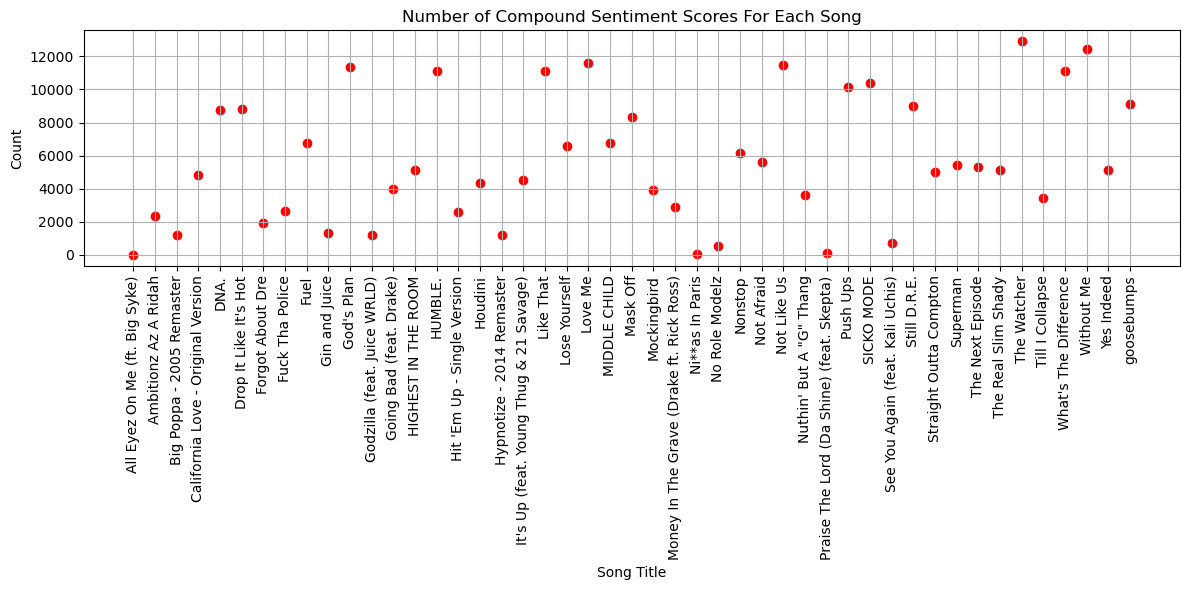

In [253]:
#Visualisation code for scatter plot for compound sentiment score array count for each song
titles = list(counts.keys())
values = list(counts.values())

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(titles, values, color='red', marker='o')
plt.title('User Engagement for each song on reddit')
plt.xlabel('Song Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [63]:
# number of topics to discover
NumOfTopics = 20
# maximum number of words to display per topic
wordNumToDisplay = 5
# Number of features/words used to describe our documents
featureNum = 2000

In [65]:
def retrieveTopics(dataFile):
    '''
    Getting the tokens for each post for topic modelling
    @dataFile: File containing all the posts
    @returns: get all the tokens in appropriate format (as a string separated by spaces)
    '''
    lTopicPosts = []
    with open(dataFile, 'r') as f:
        musicReddits = json.load(f)
        for submission in musicReddits:
            submissionTitle = submission.get('post_topic','')
            lTokensTopic = preprocessText(submissionTitle)
            lTopicPosts.append(' '.join(lTokensTopic))
    return lTopicPosts

In [67]:
#Code to execute LDA for topic modelling
fl = 'songs_data.json'
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
lTopicPosts = retrieveTopics(fl)
tf = tfVectorizer.fit_transform(lTopicPosts)
tfFeatureNames = tfVectorizer.get_feature_names_out()
ldaModel = LatentDirichletAllocation(n_components =NumOfTopics, max_iter=10, learning_method='online').fit(tf)

In [69]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.
    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [71]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
thread daili discuss straight compton
Topic 1:
album year week fresh best
Topic 2:
cole fuck live tha polic
Topic 3:
hip hop throwback curri denzel
Topic 4:
fresh feat memori thread tyler
Topic 5:
discuss billboard hot 12 june
Topic 6:
az 13 ridah ambitionz pusha
Topic 7:
drop dre watch dr ft
Topic 8:
love know man featur method
Topic 9:
shadi album slim stori death
Topic 10:
kany west freestyl fresh drake
Topic 11:
kendrick lamar video fresh big
Topic 12:
nonstop mike perform wu tang
Topic 13:
rapper fuel life jay chanc
Topic 14:
tracklist lupe fiasco trust nba
Topic 15:
gener sunday parti rick ross
Topic 16:
eminem discuss year later thi
Topic 17:
drake lil song stream ye
Topic 18:
scott travi origin version leak
Topic 19:
juic gin wrld beat come


In [83]:
#Visualisation for topics
panel = pyLDAvis.lda_model.prepare(ldaModel,tf,tfVectorizer, mds = 'tsne')
pyLDAvis.display(panel)

In [301]:
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]
    topicNum = len(model.components_)
    plotColNum = 5
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

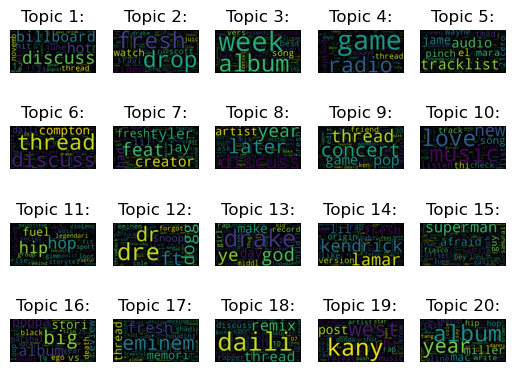

In [303]:
displayWordcloud(ldaModel, tfFeatureNames)